# Task 2

Implement a random Metropolis-Hastings MCMC algorithm, based on the true likelihood (as computed by the exact method proposed by the author), to estimate the parameters of the model for the data mentioned in the paper.

In [1]:
import sys
import os

# 1. On récupère le dossier où se trouve le notebook
current_dir = os.getcwd()

# 2. On remonte d'un cran pour trouver la racine du projet
# (Si votre notebook est dans un sous-sous-dossier, répétez os.path.dirname une fois de plus)
project_root = os.path.dirname(current_dir)

# 3. On ajoute ce chemin à Python s'il n'y est pas déjà
if project_root not in sys.path:
    sys.path.append(project_root)

# 4. Vérification (optionnel)
print(f"Racine ajoutée : {project_root}")
print(f"Dossier 'src' détecté ? : {os.path.isdir(os.path.join(project_root, 'src'))}")

Racine ajoutée : /home/onyxia/work/Non-Gaussian-State-Space-Models
Dossier 'src' détecté ? : True


In [2]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from scipy.special import gammaln
from scipy.stats import poisson, nbinom
from tqdm import tqdm
import openpyxl


# particles library usage 
import particles
import particles.state_space_models as ssm
import particles.distributions as dists


# project related packages
import src.cox_simulation as cx
import utils.plots as pl
import src.creal_filter as cf 
import src.particle_filter as pf
import src.metropolis as mt
import utils.load_data as ld

✅ Chargé: Serie_1 (Beta: None)


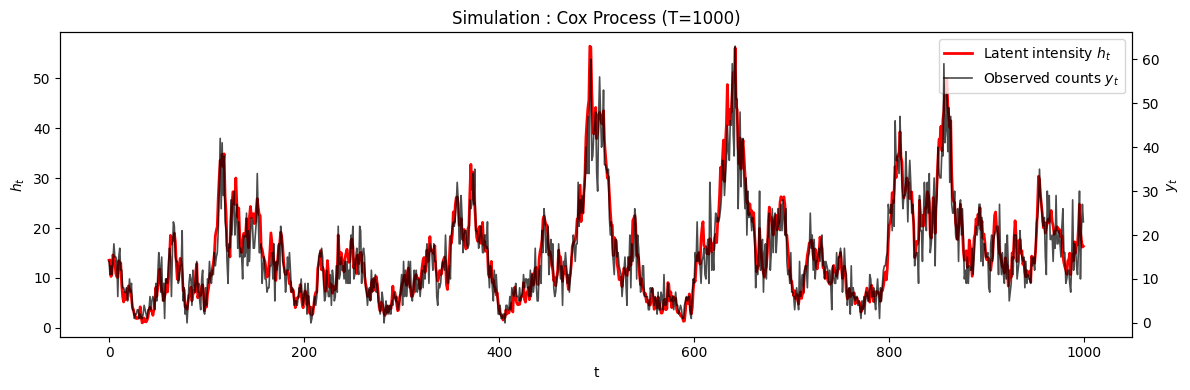

In [3]:
# {"phi": 0.965, "nu": 2.5, "c": 0.2} sans covariates
excel_path = os.path.join(project_root, "data", "data_groupe_T1000.xlsx")
y1, X1, h1, beta1, p1 = ld.load_data(excel_path, "Serie_1")
pl.plot_overlay_clean(y1, h1, T_show=1000, start=0)

✅ Chargé: Serie_2 (Beta: [-0.5  0.3])


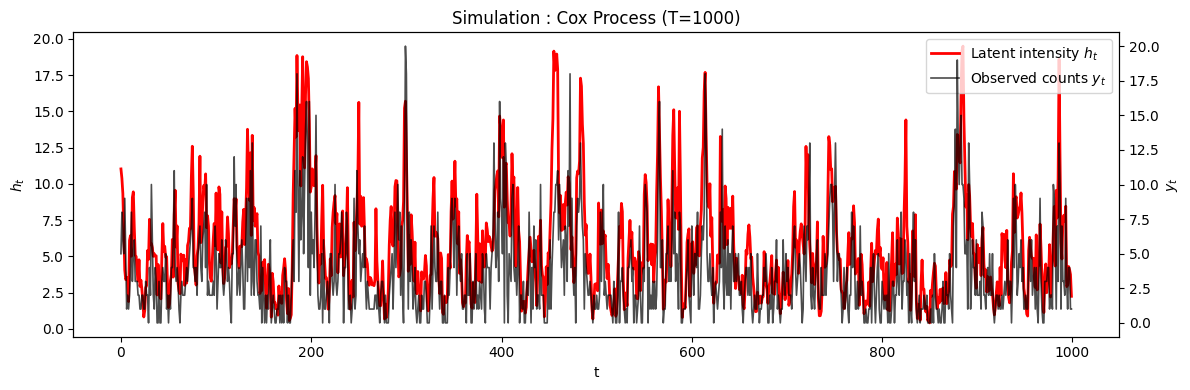

In [4]:
# {"phi": 0.8, "nu": 3, "c": 0.4} avec covariates; beta1 = np.array([-0.5, 0.3])
y2, X2, h2, beta2, p2 = ld.load_data(excel_path, "Serie_2")
pl.plot_overlay_clean(y2, h2, T_show=1000, start=0)


✅ Chargé: Serie_3 (Beta: [-0.5  0.4 -0.3])


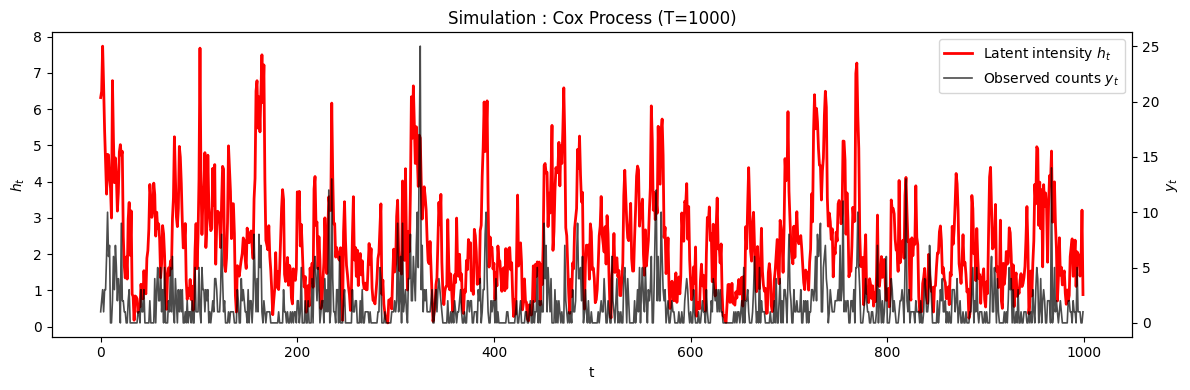

In [5]:
# params_3 = {"phi": 0.8, "nu": 2.5, "c": 0.2} beta2 = np.array([-0.5, 0.4, -0.3])
y3, X3, h3, beta3, p3 = ld.load_data(excel_path, "Serie_3")
pl.plot_overlay_clean(y3, h3, T_show=1000, start=0)


In [6]:
# Exact filter truncation
Z_TRUNC = 200
exact1 = cf.ExactFilter(y1, Z_trunc=Z_TRUNC)

In [7]:
# 2. Lance le MCMC
#0.965, "nu": 2.5, "c": 0.2
# On part des vraies valeurs ou proche pour tester
#chain_results = mt.run_metropolis_exact(
#    y1, 
#    exact1, 
#    n_iterations=2500, 
#    initial_theta=[0.8, 2.5, 0.5], # phi, nu, c
#    proposal_std=[0.008, 0.07, 0.03] # Petits pas pour commencer
#)

In [ ]:
# --- UTILISATION ---
res = mt.run_multi_chain_mcmc(y1, exact1, n_chains=20, n_iter=3000, true_params=[0.965, 2.5, 0.2], proposal_std=[0.008, 0.07, 0.01],burn_in=1000)

🚀 Lancement de 20 chaînes MCMC en parallèle sur CPU...


Progression globale: 100%|██████████| 20/20 [00:00<00:00, 341.73it/s]
